<Axes: >

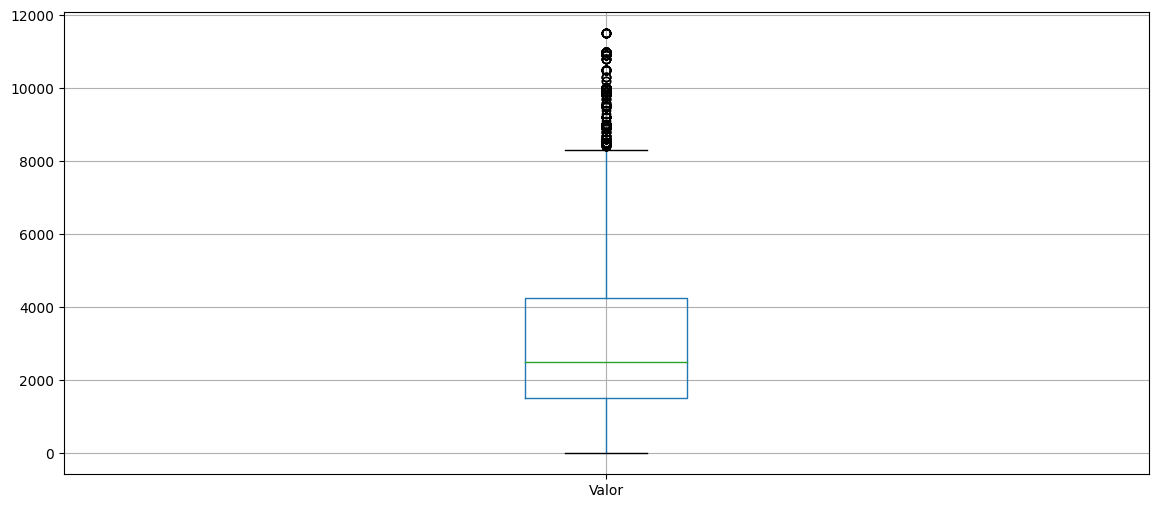

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (14,6))

data = pd.read_csv("./alquiler_residencial.csv", sep=";")
data.fillna(0, inplace=True)
data[data["Valor"] >= 500000]

valor = data["Valor"]
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selection = ((valor >= limite_inferior) & (valor <= limite_superior))
data_new = data[selection]
data_new.boxplot(["Valor"])




In [3]:
data.hist(["Valor"])
data_new.hist(["Valor"])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

In [10]:
data.boxplot(["Valor"], by = ["Tipo"])

grupo_tipo = data.groupby("Tipo")["Valor"]
type(grupo_tipo)


grupo_tipo.groups
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = data["Tipo"] == tipo
    eh_dentro_limite = (data["Valor"] >= limite_inferior[tipo]) & (data["Valor"] <= limite_superior[tipo])
    selection = eh_tipo & eh_dentro_limite
    data_selection = data[selection]
    data_new = pd.concat([data_new, data_selection])

data_new.boxplot(["Valor"], by = ["Tipo"])
data_new.to_csv("alquiler_residencial_sin_outliers.csv", sep=";", index=False)

